<a href="https://colab.research.google.com/github/Sauraj1234/MachineLearning_Basics/blob/master/AutoEncoder(image_denoiseing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import tarfile
import cv2
import time
import os

In [6]:
!pwd

/content


In [0]:
tar =tarfile.open('cifar.tgz')
tar.extractall()

In [0]:
# file_path=!pwd
img_array=[]
path='/content/cifar/train'
for i in os.listdir(path):
  file= cv2.imread(os.path.join(path,i))
  img_array.append(file)

In [0]:
img_database = np.array(img_array)

In [20]:
img_database.shape

(50000, 32, 32, 3)

In [0]:
def plot_image(img):
  fig,axes=plt.subplots(2,8,figsize =(13,3))
  for i in range(8):
    axes[0,i].imshow(img[i])
    axes[0,i].axis('off')
    axes[0,i].imshow(img[i+8])
    axes[0,i].axis('off')

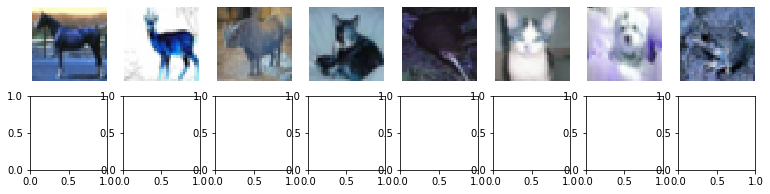

In [31]:
total_img_shape=2000
train_img_data=np.array(img_database[0:total_img_shape])
train_img_data=train_img_data.astype('float32')
train_img_data = train_img_data/255
plot_image(train_img_data)

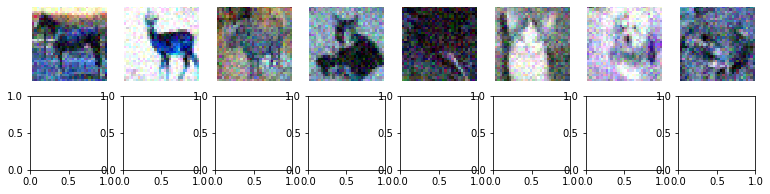

In [34]:
train_img_data_noisy = train_img_data+ 0.1*np.random.normal(loc=0.0,scale=1.0,size=train_img_data.shape)
train_img_data_noisy = np.clip(train_img_data_noisy,0,1)
plot_image(train_img_data_noisy)

In [73]:
## feed RGB images to neural Network 
print(train_img_data.shape)
X_T= np.transpose(train_img_data,(0,3,1,2)) # indexing 
print(X_T.shape)
# print(train_img_data_noisy)
X_T_noisy = np.transpose(train_img_data_noisy,(0,3,1,2)) # indexing 


X_flat = X_T.reshape(-1,1024)
X_flat.shape
X_flat_n = X_T_noisy.reshape(-1,1024)
X_flat_n.shape

(2000, 32, 32, 3)
(2000, 3, 32, 32)


(6000, 1024)

In [0]:
learning_rate = 0.001
training_epoch=10000
batch_size=100 
display_step=100
example_to_show=8

In [0]:
n_hidden_1=512
n_hidden_2=256
n_hidden_3=128
n_input=1024

In [0]:
X= tf.placeholder("float",[None,n_input])
Y= tf.placeholder("float",[None,n_input])
nn_weight={ "encoder_W1": tf.Variable(tf.truncated_normal([n_input,n_hidden_1],stddev=0.01)),
            "encoder_W2":tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2],stddev=0.01)),
            "encoder_W3":tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3],stddev=0.01)),
            "Decoder_W1":tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_2],stddev=0.01)), 
            "Decoder_W2":tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_1],stddev=0.01)),
            "Decoder_W3":tf.Variable(tf.truncated_normal([n_hidden_1,n_input],stddev=0.01))
            }
nn_bias = { "encoder_B1": tf.Variable(tf.truncated_normal([n_hidden_1],stddev=0.01)),
            "encoder_B2":tf.Variable(tf.truncated_normal([n_hidden_2],stddev=0.01)),
            "encoder_B3":tf.Variable(tf.truncated_normal([n_hidden_3],stddev=0.01)),
            "Decoder_B1":tf.Variable(tf.truncated_normal([n_hidden_2],stddev=0.01)), 
            "Decoder_B2":tf.Variable(tf.truncated_normal([n_hidden_1],stddev=0.01)),
            "Decoder_B3":tf.Variable(tf.truncated_normal([n_input],stddev=0.01))}

In [0]:
def encoder(x):
  layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,nn_weight['encoder_W1']),nn_bias['encoder_B1']))
  layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,nn_weight['encoder_W2']),nn_bias['encoder_B2']))
  layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2,nn_weight['encoder_W3']),nn_bias['encoder_B3']))
  return layer_3
def decoder(layer_3):
  layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3,nn_weight['Decoder_W1']),nn_bias['Decoder_B1']))
  layer_5 = tf.nn.sigmoid(tf.add(tf.matmul(layer_4,nn_weight['Decoder_W2']),nn_bias['Decoder_B2']))
  layer_6 = tf.nn.sigmoid(tf.add(tf.matmul(layer_5,nn_weight['Decoder_W3']),nn_bias['Decoder_B3']))
  return layer_6

In [67]:
encoder_out=encoder(X)
out=decoder(encoder_out)

y_pred= out

cost =tf.reduce_mean(tf.pow(Y-y_pred,2))
optimizer= tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)

init= tf.global_variables_initializer()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [82]:
start= time.time()
# print(X_flat.shape)
total_batch= int(X_flat.shape[0]/batch_size)
sess = tf.Session()
sess.run(init)
for epoch in range(training_epoch):
  # print(epoch)
  start=0;end=batch_size
  for i in range(total_batch-1):
    index = np.arange(start,end)
    np.random.shuffle(index)
    batch_xs = X_flat[index]
    batch_xsn= X_flat_n[index]
    start=end;end=start+batch_size

    _,c= sess.run([optimizer,cost],feed_dict={X:batch_xs,Y:batch_xsn})

  if(epoch %1000 ==0):
    print('EPOCH :{} loss :{}'.format(epoch,c))
print('optimizer finished ')
end=time.time()
print("time taken {}".format(end- start))

EPOCH :0 loss :0.08218327164649963
EPOCH :1000 loss :0.03778807818889618
EPOCH :2000 loss :0.029512200504541397
EPOCH :3000 loss :0.023862324655056
EPOCH :4000 loss :0.020162755623459816
EPOCH :5000 loss :0.017682556062936783
EPOCH :6000 loss :0.015578613616526127
EPOCH :7000 loss :0.014310969039797783
EPOCH :8000 loss :0.013329658657312393
EPOCH :9000 loss :0.012465141713619232
optimizer finished 
time taken 1576015280.7331438
